In [4]:
from keras.datasets import boston_housing
import numpy as np

Using TensorFlow backend.


In [5]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [6]:
train_data.shape

(404, 13)

In [7]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

In [8]:
train_data = train_data - mean
train_data = train_data/std
test_data = test_data - mean
test_data = test_data/std

In [9]:
train_data.sum(axis=0)

array([-4.10227408e-14,  4.44089210e-15,  7.04325487e-13, -5.11812814e-14,
       -2.12252438e-12,  2.59131605e-12,  1.20570220e-13,  1.99840144e-13,
        4.55191440e-15, -8.00470801e-14,  9.56212887e-12,  2.40654718e-12,
        2.48023824e-13])

In [10]:
from keras import models
from keras import layers

In [11]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])#mae : mean absolute error, mse : mean squared error
    return model

In [12]:
model = build_model()

In [13]:
model.fit(x= train_data, y = train_targets,batch_size=16,epochs=10)

Epoch 1/10
404/404 [==============================] - 0s 260us/step - loss: 504.7741 - mean_absolute_error: 20.3637
Epoch 2/10
404/404 [==============================] - 0s 59us/step - loss: 332.6753 - mean_absolute_error: 15.6956
Epoch 3/10
404/404 [==============================] - 0s 64us/step - loss: 159.5127 - mean_absolute_error: 9.9848
Epoch 4/10
404/404 [==============================] - 0s 42us/step - loss: 72.3855 - mean_absolute_error: 6.4189
Epoch 5/10
404/404 [==============================] - 0s 54us/step - loss: 45.2289 - mean_absolute_error: 4.9013
Epoch 6/10
404/404 [==============================] - 0s 52us/step - loss: 32.0809 - mean_absolute_error: 4.0965
Epoch 7/10
404/404 [==============================] - 0s 64us/step - loss: 25.6571 - mean_absolute_error: 3.5815
Epoch 8/10
404/404 [==============================] - 0s 77us/step - loss: 21.5032 - mean_absolute_error: 3.3242
Epoch 9/10
404/404 [==============================] - 0s 58us/step - loss: 18.5133 - mean_

In [14]:
model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 382us/step


[24.704536886776197, 3.547605318181655]

# K-Fold Validation

In [15]:
k = 2
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [16]:
for i in range(k):
    print("processing fold # ",i)
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]
    
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data,partial_targets,epochs=num_epochs,batch_size=1,verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets)
    all_scores.append(val_mae)
    

processing fold #  0
202/202 [==============================] - 0s 118us/step
processing fold #  1
202/202 [==============================] - 0s 139us/step


In [17]:
all_scores

[2.6953484209457246, 2.7772056017771805]

In [19]:
np.mean(all_scores)

2.7362770113614525

In [27]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

In [28]:
for i in range(k):
    print("processing fold # ",i)
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]
    
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data,partial_targets,epochs=num_epochs,batch_size=1,verbose=0,
                        validation_data=(val_data, val_targets), )
#     print(history.history)
    mae_history = history.history['val_mean_absolute_error']
#     print(mae_history)
    
    all_mae_histories.append(mae_history)
    
    

processing fold #  0
processing fold #  1
processing fold #  2
processing fold #  3


In [20]:
import matplotlib.pyplot as plt

In [57]:
np.array(all_mae_histories).shape

(4, 500)

In [35]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [59]:
np.array(average_mae_history).shape

(500,)

In [62]:
np.sum(all_mae_histories,axis=0)/4 == average_mae_history

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [40]:
len(average_mae_history)

500

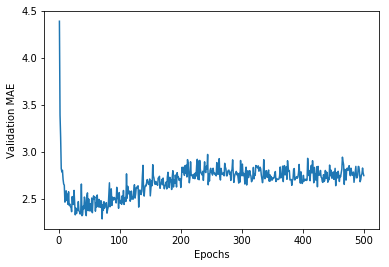

In [22]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

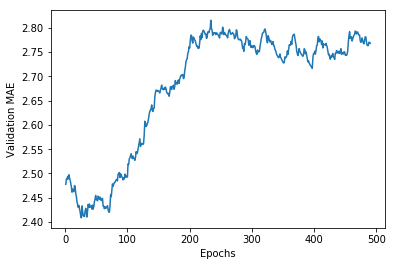

In [26]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [27]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 655us/step


In [28]:
test_mae_score

2.9258010434169397